In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import splitfolders

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
base_path = 'E:\\Datasets\\ASL\\asl_dataset'

categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

filenames_list = []
categories_list = []


for category in categories:
    path = os.path.join(base_path, categories[category])
    filenames = os.listdir(path)
    for filename in filenames:
        filenames_list.append(os.path.join(categories[category],filename))
    #filenames_list = filenames_list+ filenames
    categories_list = categories_list + [category]*len(filenames)

df = pd.DataFrame({'filename': filenames_list, 'category': categories_list} )
df = df.sample(frac=1).reset_index(drop=True)

df

filename  category
0       3\hand3_3_dif_seg_5_cropped.jpeg         3
1       b\hand1_b_bot_seg_1_cropped.jpeg        11
2       x\hand5_x_dif_seg_1_cropped.jpeg        33
3     y\hand2_y_right_seg_3_cropped.jpeg        34
4       4\hand1_4_bot_seg_1_cropped.jpeg         4
...                                  ...       ...
2510    7\hand1_7_dif_seg_1_cropped.jpeg         7
2511  j\hand1_j_right_seg_4_cropped.jpeg        19
2512    s\hand2_s_top_seg_5_cropped.jpeg        28
2513   9\hand2_9_left_seg_5_cropped.jpeg         9
2514    i\hand1_i_dif_seg_5_cropped.jpeg        18

[2515 rows x 2 columns]

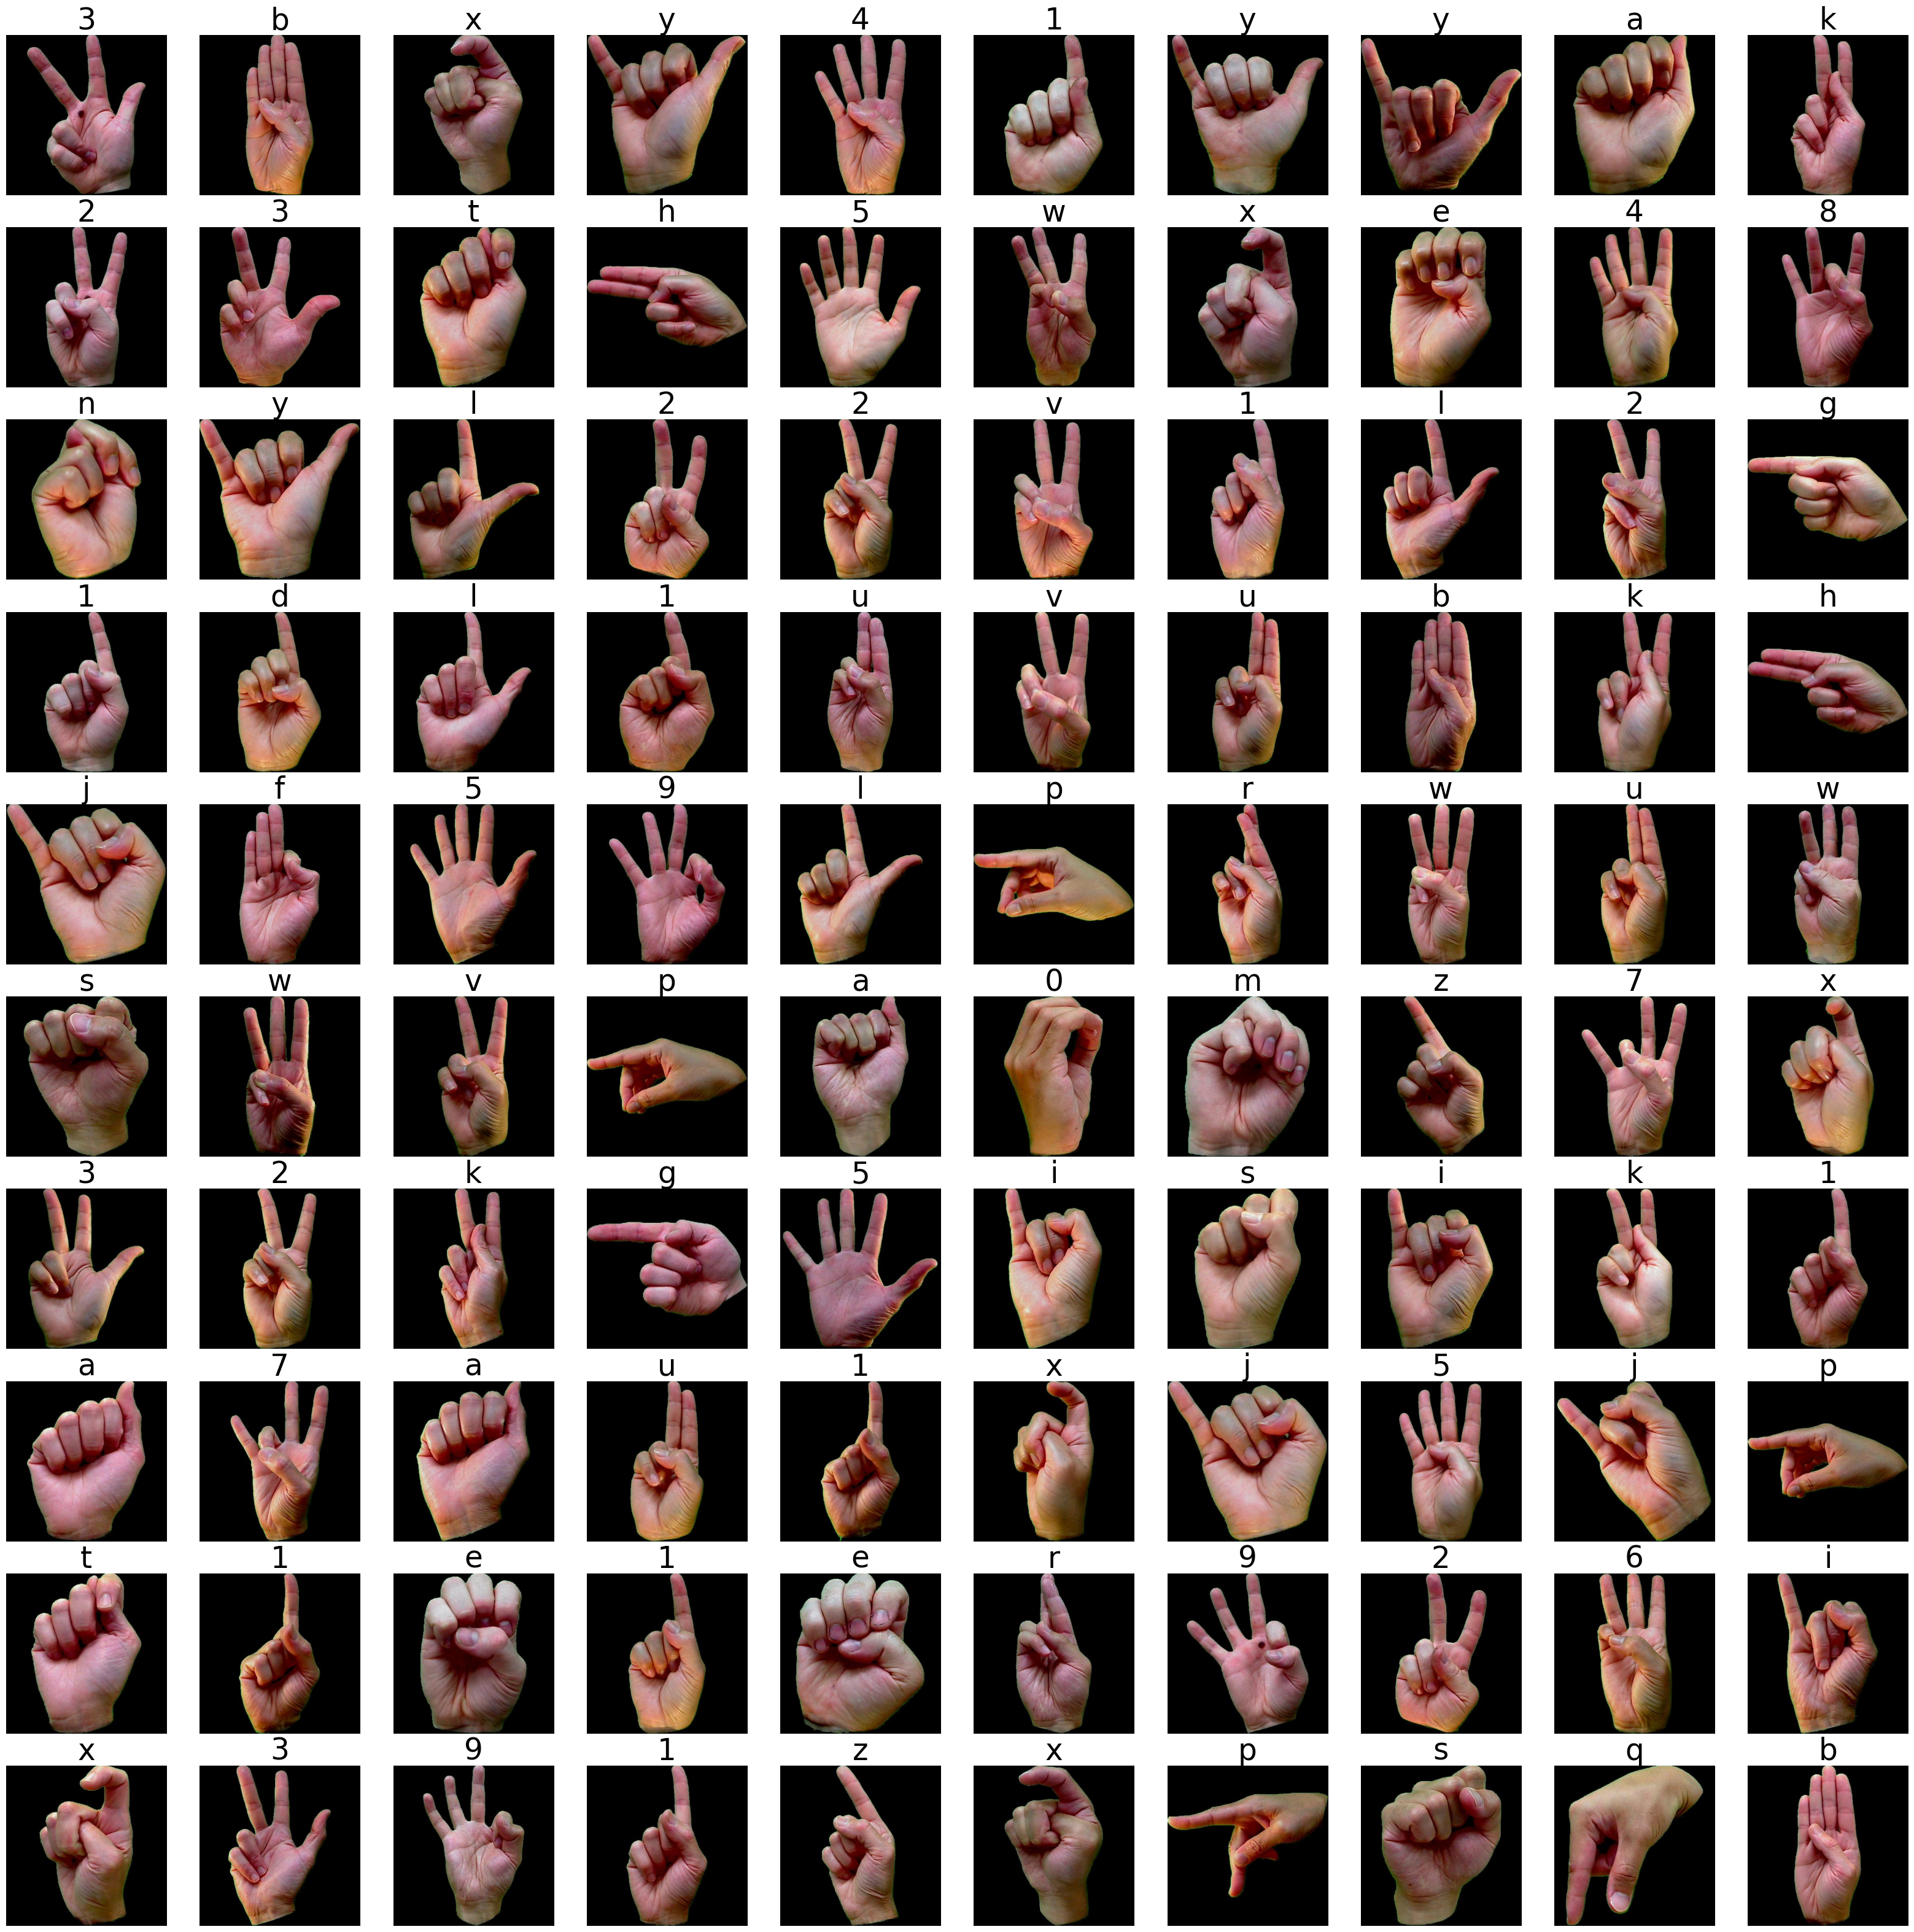

In [15]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = os.path.join(base_path, df.filename[i])
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35)
    plt.axis("off")

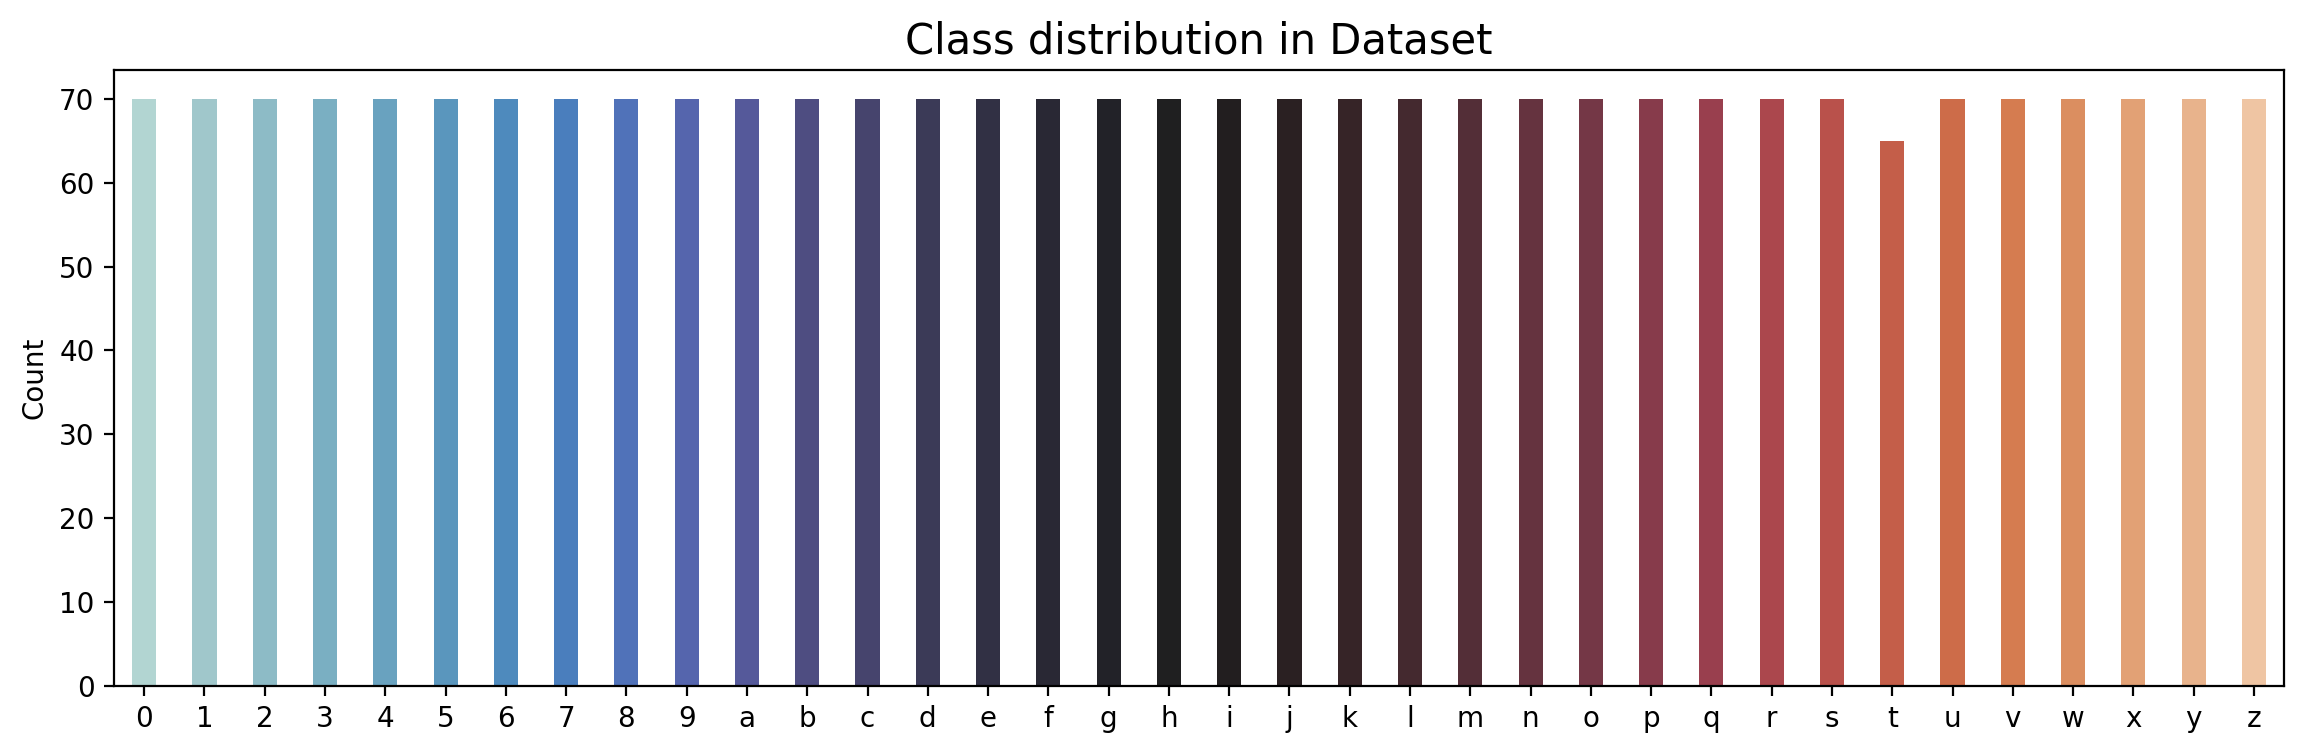

In [16]:
label, count = np.unique(df.category, return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

In [6]:
splitfolders.ratio('E:\\Datasets\\ASL\\asl_dataset',output='E:\\Datasets\\ASL\\asl_split', seed=1333, ratio=(0.8,0.1,0.1))

In [17]:
datagen = ImageDataGenerator(rescale = 1.0/255)

In [18]:
train_path = 'E:\\Datasets\\ASL\\asl_split\\train'
test_path = 'E:\\Datasets\\ASL\\asl_split\\test'
val_path = 'E:\\Datasets\\ASL\\asl_split\\val'

batch_size = 32
image_size = 200
img_channel = 3
n_classes = 36

In [19]:
train_data = datagen.flow_from_directory(train_path,
                                         batch_size = batch_size,
                                         target_size=(image_size, image_size),
                                         class_mode= 'categorical')

test_data = datagen.flow_from_directory(test_path,
                                         batch_size = batch_size,
                                         target_size=(image_size, image_size),
                                         class_mode= 'categorical')

val_data = datagen.flow_from_directory(val_path,
                                         batch_size = batch_size,
                                         target_size=(image_size, image_size),
                                         class_mode= 'categorical')

Found 2012 images belonging to 36 classes.
Found 252 images belonging to 36 classes.
Found 251 images belonging to 36 classes.


In [27]:
inp = tf.keras.layers.Input(shape=(200,200,3))

model = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(inp)
#model = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.MaxPool2D(padding='same')(model)
model = tf.keras.layers.Dropout(0.2)(model)

#model = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.MaxPool2D(padding='same')(model)
model = tf.keras.layers.Dropout(0.3)(model)

#model = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.MaxPool2D(padding='same')(model)
model = tf.keras.layers.Dropout(0.4)(model)

model = tf.keras.layers.Flatten()(model)

#model = tf.keras.layers.Dense(512, activation='relu')(model)
model = tf.keras.layers.Dropout(0.2)(model)
model = tf.keras.layers.Dense(128, activation='relu')(model)
model = tf.keras.layers.Dropout(0.3)(model)

out = tf.keras.layers.Dense(n_classes, activation='softmax')(model)

model = tf.keras.Model(inputs = [inp], outputs = out)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_73 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_58 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                      

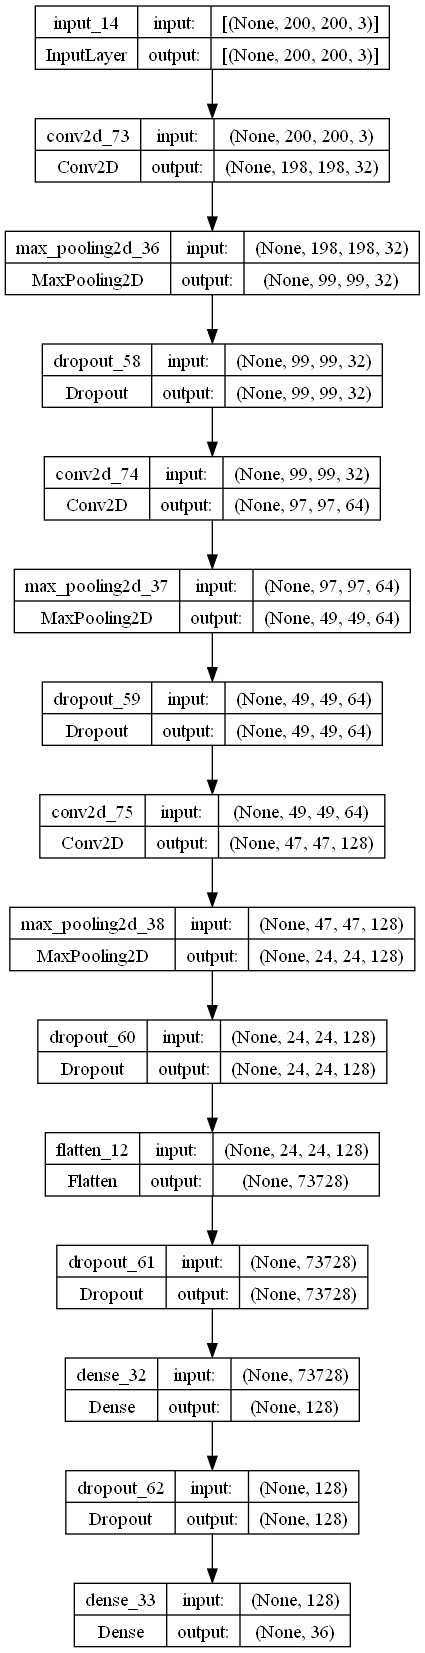

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta= 0.001,
                                                  patience=5,
                                                  restore_best_weights=True,
                                                  verbose=0)

reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                            patience = 2,
                                                            factor = 0.5,
                                                            verbose=0)

In [29]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [30]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=10,
                      callbacks= [early_stopping, reduce_learning_rate],
                      verbose = 1)

Epoch 1/10
63/63 [==============================] - 172s 3s/step - loss: 2.2032 - accuracy: 0.3971 - val_loss: 0.7625 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 2/10
63/63 [==============================] - 150s 2s/step - loss: 0.5917 - accuracy: 0.8221 - val_loss: 0.2516 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 3/10
63/63 [==============================] - 144s 2s/step - loss: 0.3320 - accuracy: 0.8936 - val_loss: 0.2053 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 4/10
63/63 [==============================] - 165s 3s/step - loss: 0.1885 - accuracy: 0.9349 - val_loss: 0.1511 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 5/10
63/63 [==============================] - 162s 3s/step - loss: 0.1315 - accuracy: 0.9553 - val_loss: 0.1465 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 6/10
63/63 [==============================] - 152s 2s/step - loss: 0.1159 - accuracy: 0.9637 - val_loss: 0.1556 - val_accuracy: 0.9522 - lr: 0.0010
Epoch 7/10
63/63 [==============================] - 154s 2s/step - loss: 0.1

In [31]:
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.25447106361389
The Loss of the model for training data is: 0.016472717747092247
The accuracy of the model for validation data is: 96.4143455028534
The Loss of the model for validation data is: 0.11676814407110214


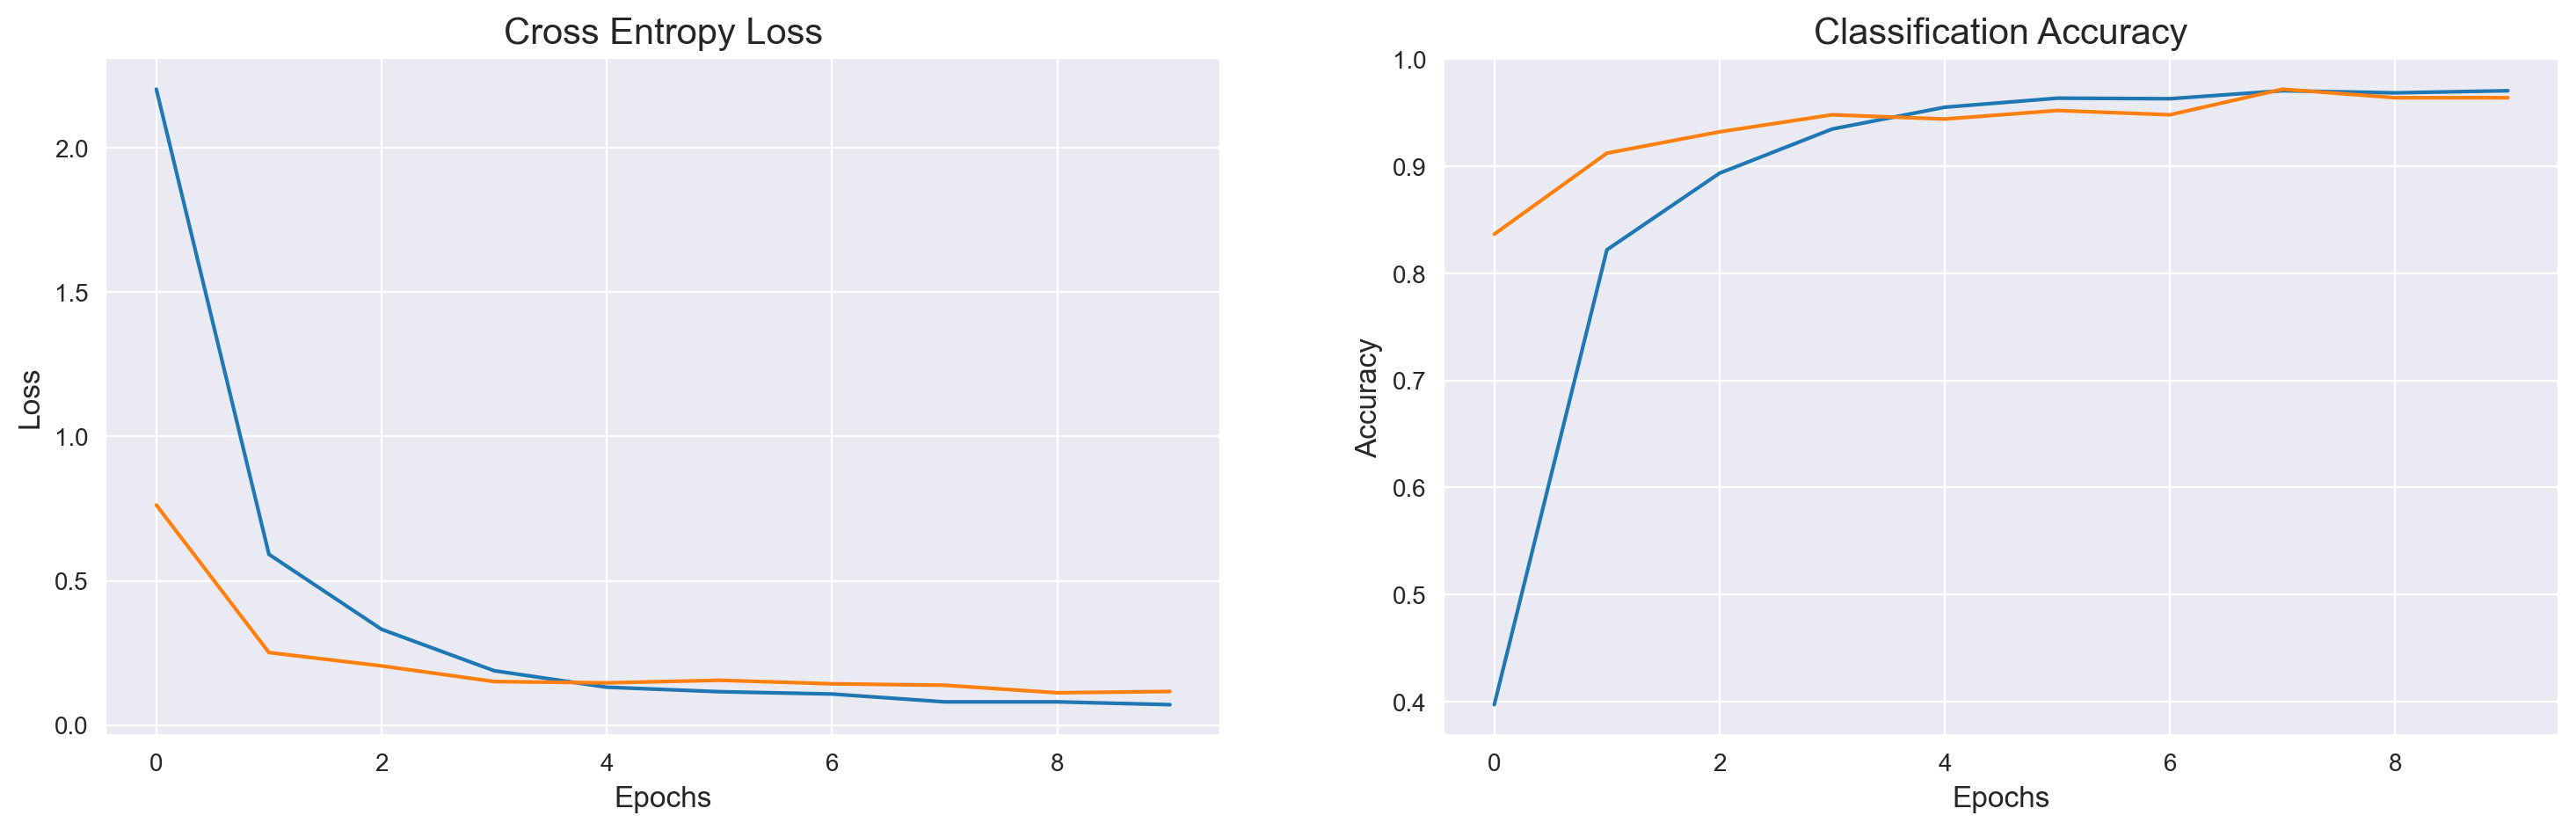

In [32]:
error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [33]:
model.save('asl_model_1.h5')